---
<h1>Table of Contents<span class="tocSkip"></span></h1>

---
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Web-Scraping-using-Beautiful-Soup" data-toc-modified-id="1.-Web-Scraping-using-Beautiful-Soup-1">1. Web Scraping using Beautiful Soup</a></span><ul class="toc-item"><li><span><a href="#1.1-Example:-Scraping-a-webpage-using-Beautiful-Soup" data-toc-modified-id="1.1-Example:-Scraping-a-webpage-using-Beautiful-Soup-1.1">1.1 Example: Scraping a webpage using Beautiful Soup</a></span></li><li><span><a href="#1.2-Example:-Scraping-a-wikipedia-article" data-toc-modified-id="1.2-Example:-Scraping-a-wikipedia-article-1.2">1.2 Example: Scraping a wikipedia article</a></span></li><li><span><a href="#1.3-Customising-Request-Headers" data-toc-modified-id="1.3-Customising-Request-Headers-1.3">1.3 Customising Request Headers</a></span></li></ul></li></ul></div>

---
# 1. Web Scraping using Beautiful Soup
---
A lot of websites return complex HTML or XML documents as responses to HTTP Requests. [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) is a Python library that helps processing these HTML or XML documents and getting useful data from them. 

In this notebook, we will explore HTML parsing with Beautiful Soup. For a nice tutorial on HTML, see <https://www.w3schools.com/html/>.

In [ ]:
import requests # Performs HTTP requests and can get HTTP response
from bs4 import BeautifulSoup # If the HTTP response is HTML, XML and not json, bs4 can help us parse it

## 1.1 Example: Scraping a webpage using Beautiful Soup
In this example, we are going to scrape <https://w3schools.com/tags/ref_byfunc.asp> using Beautiful Soup. A sample screen can be seen below.

<center>
    <div>
        <img src="Images\html_ref_1.png"/>
    </div>
</center>
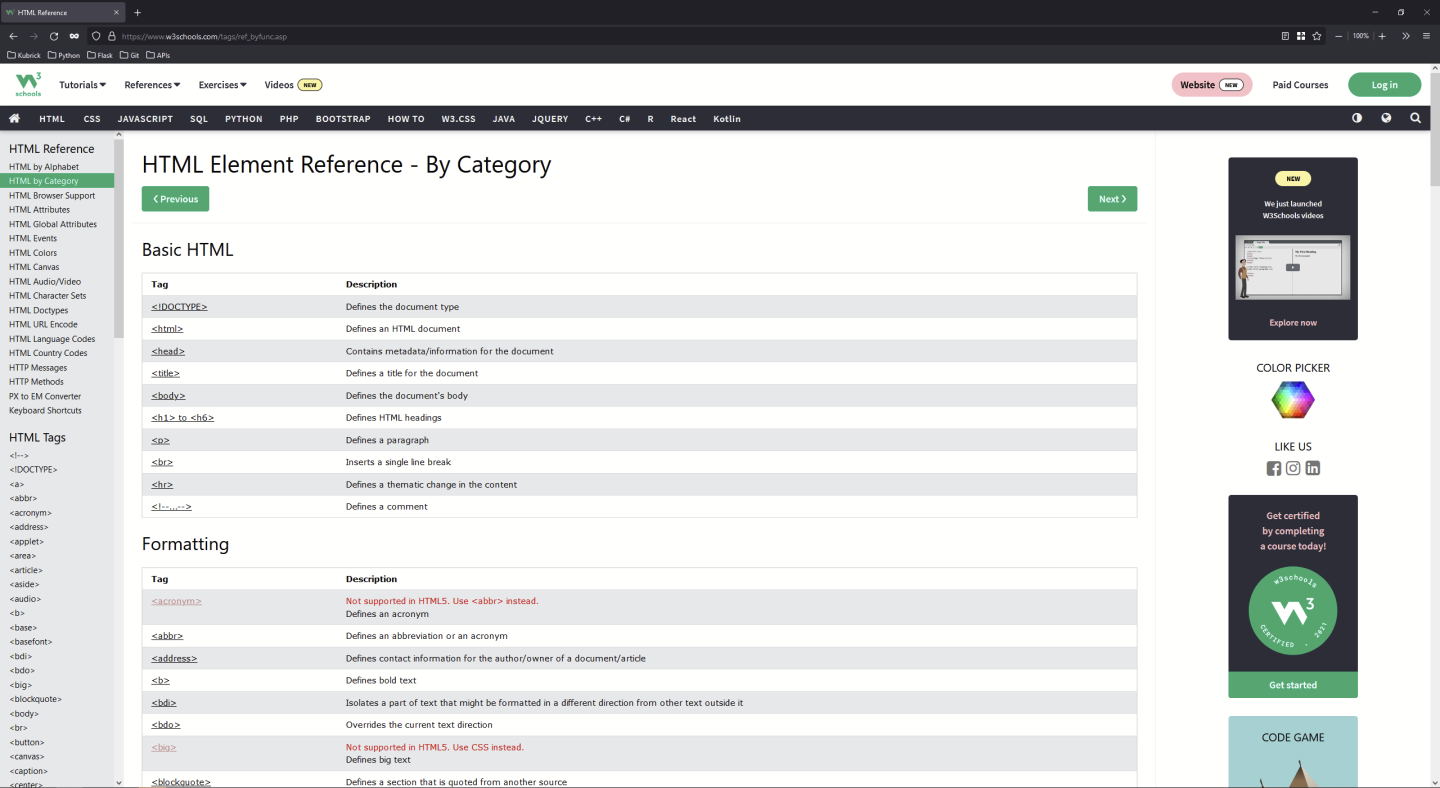

In [8]:
url = "https://www.w3schools.com/tags/ref_byfunc.asp"
r = requests.get(url)
print("Status code: ", r.status_code)
r.text[: 1000] # This response is the entire HTML document in a text format, which is difficult to process

Status code:  200


'\n<!DOCTYPE html>\n<html lang="en-US">\n<head>\n<title>HTML Reference</title>\n<meta charset="utf-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<meta name="Keywords" content="HTML, Python, CSS, SQL, JavaScript, How to, PHP, Java, C, C++, C#, jQuery, Bootstrap, Colors, W3.CSS, XML, MySQL, Icons, NodeJS, React, Graphics, Angular, R, AI, Git, Data Science, Code Game, Tutorials, Programming, Web Development, Training, Learning, Quiz, Exercises, Courses, Lessons, References, Examples, Learn to code, Source code, Demos, Tips, Website">\n<meta name="Description" content="Well organized and easy to understand Web building tutorials with lots of examples of how to use HTML, CSS, JavaScript, SQL, Python, PHP, Bootstrap, Java, XML and more.">\n<meta property="og:image" content="https://www.w3schools.com/images/w3schools_logo_436_2.png">\n<meta property="og:image:type" content="image/png">\n<meta property="og:image:width" content="436">\n<meta property="og:image:heigh

In [10]:
# First, we create a soup object from the html
soup = BeautifulSoup(r.text, "html.parser") # this will allow us to navigate through the html


**Note**: This HTML source document can also be viewed on any modern web browser such as Chrome, Firefox or Edge by hitting Ctrl+U on the corresponding webpage.

### Inspecting Elements in the Web Page <a class='tocSkip'>
We can look up tags and attributes for different HTML elements (Tables, Paragraphs, Images etc.) by right clicking on the element and selecting 'Inspect'.

Let us look at the attributes for the "Basic HTML" table. 

From the screenshot below, we can see that this table has the attribute `'class':'ws-table-all notranslate'`. Note that other elements in the page may also share the same attributes. 

<center>
    <div>
        <img src="Images\html_ref_2.png"/>
    </div>
</center>



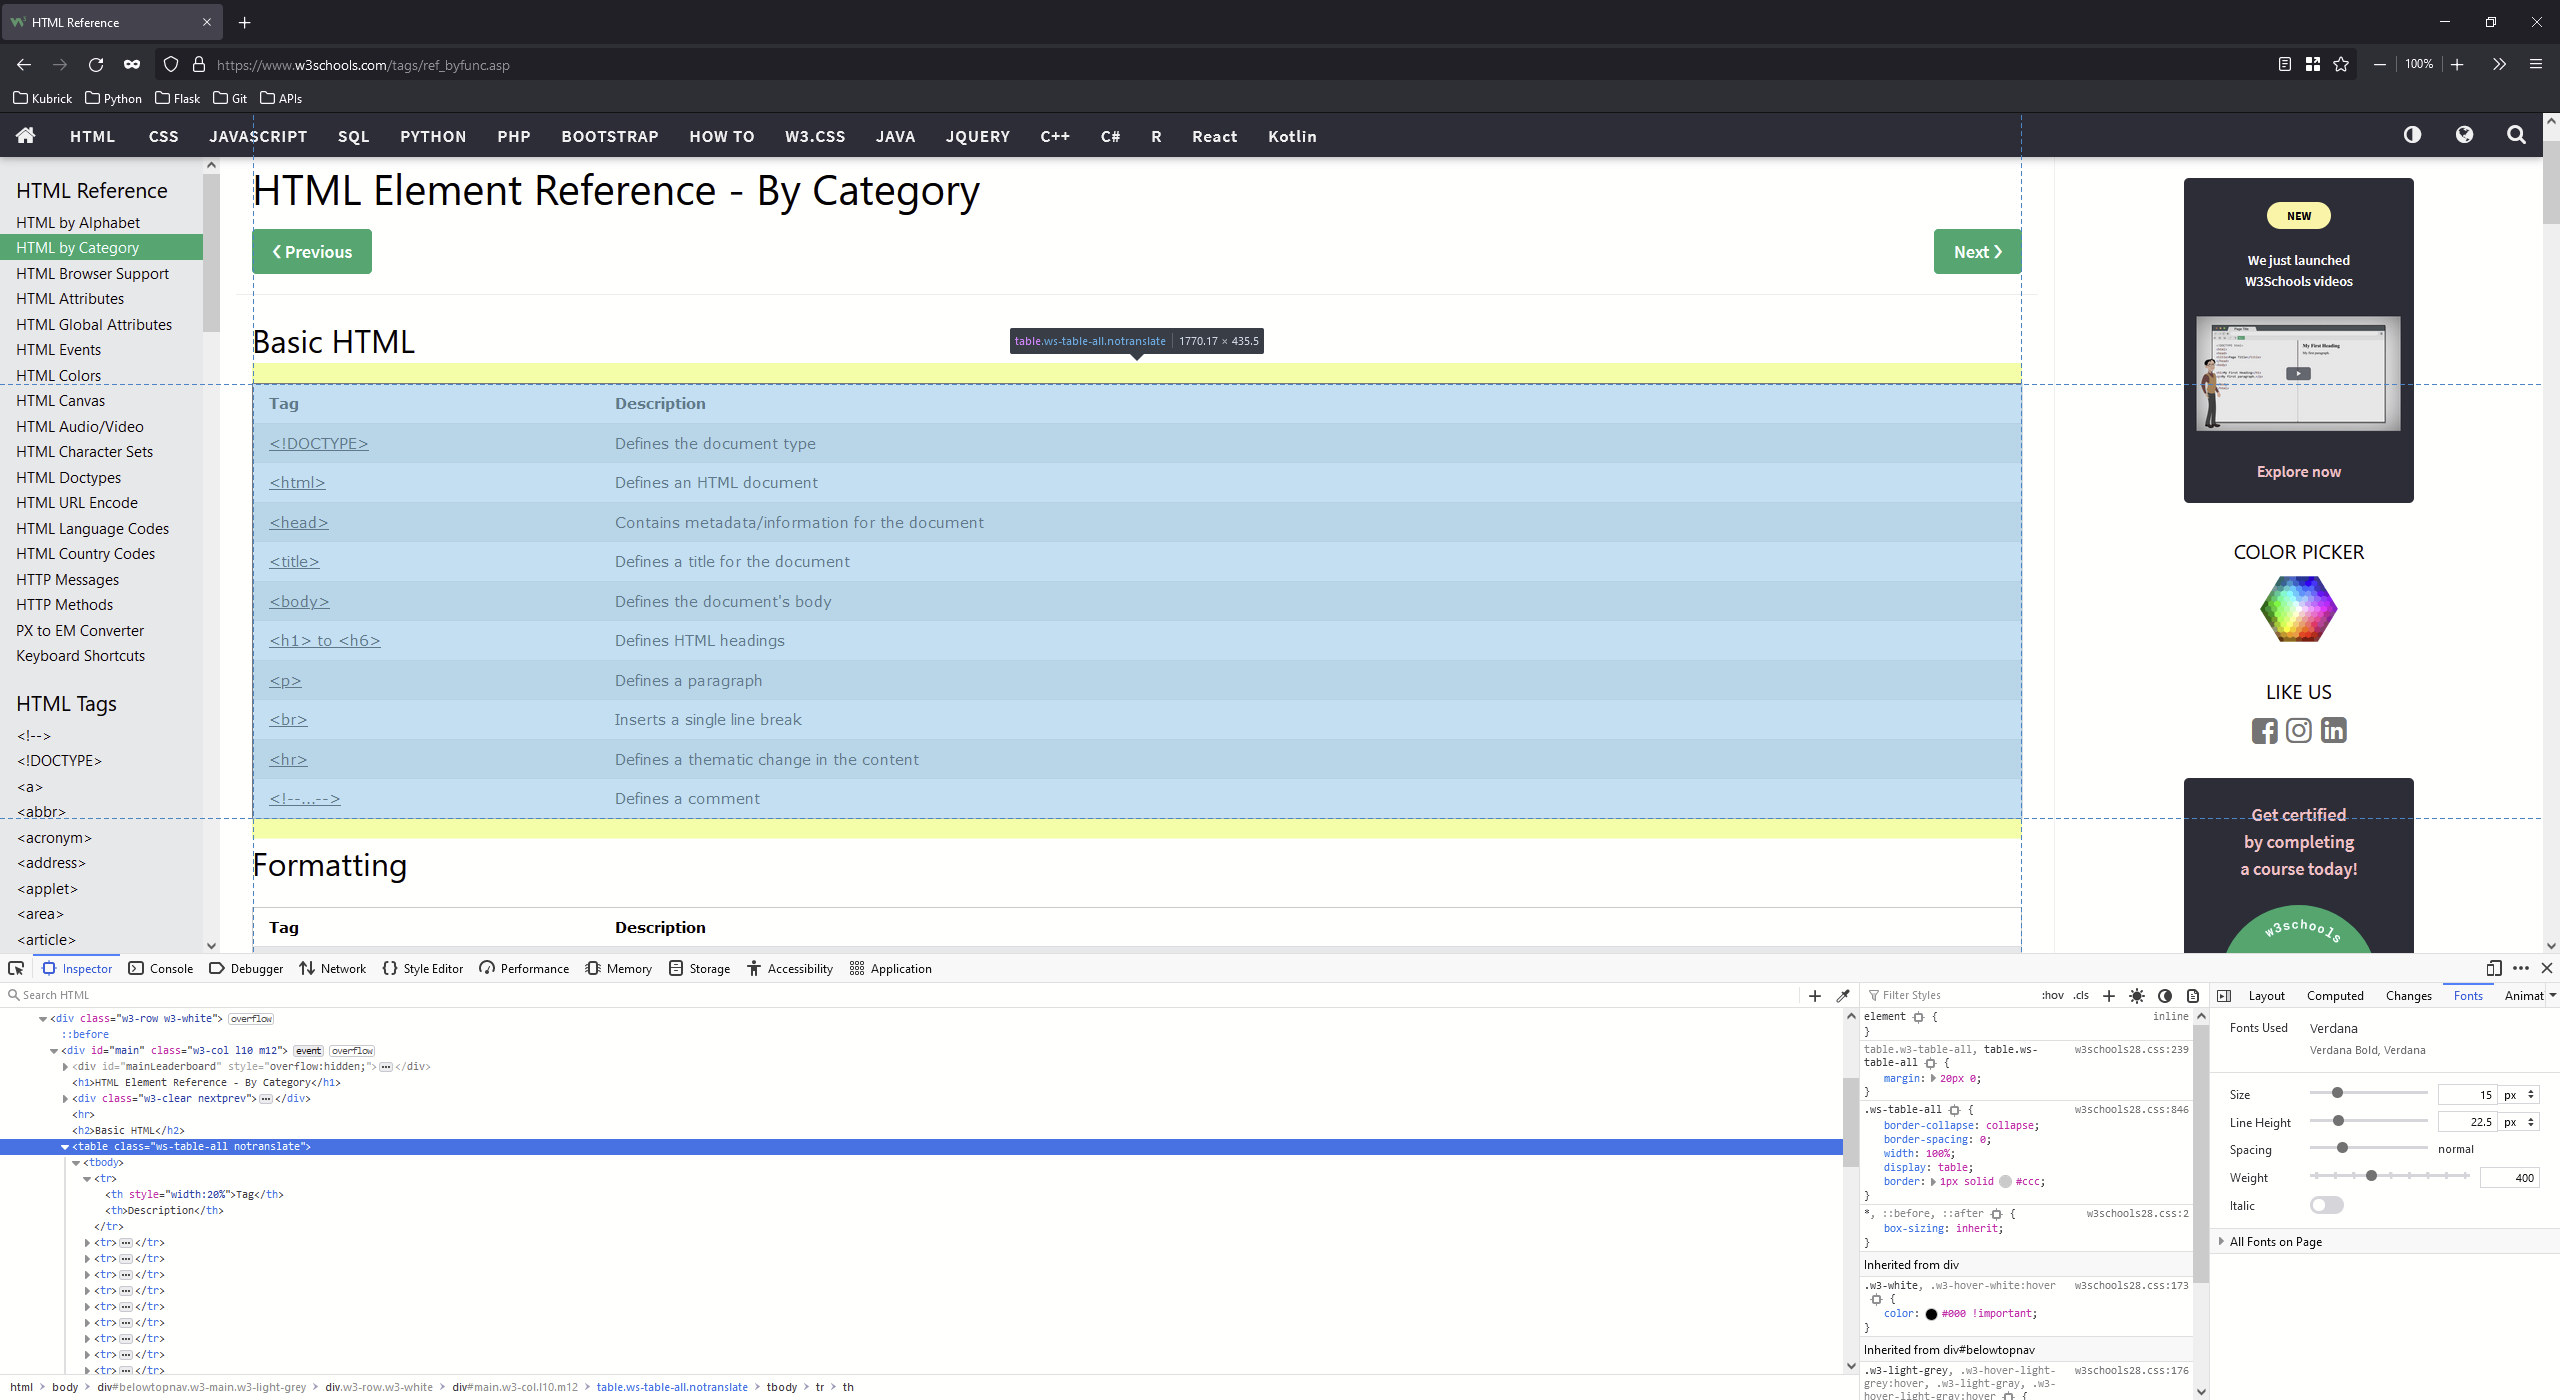

In [11]:
tag = "table"
attributes = {"class": "ws-table-all notranslate"}
table_soup = soup.find(tag, attributes)

The `.find` method finds the first element with the specified tag and attributes. All elements with the specified tag and attributes can be found using `.find_all` method

In [13]:
table_data = []
for row in table_soup.find_all("tr"): # find all 'tr' table rows
    row_text = [] # for each row, we want a list of the text
    for ele in row.find_all("td"): # find all 'td' table data, individual elements in a row
        row_text.append(ele.text.strip()) # for each element, we convert to text and strip any white space
    table_data.append(row_text) # append each row to the table_data list

table_data

[[],
 ['<!DOCTYPE>', 'Defines the document type'],
 ['<html>', 'Defines an HTML document'],
 ['<head>', 'Contains metadata/information for the document'],
 ['<title>', 'Defines a title for the document'],
 ['<body>', "Defines the document's body"],
 ['<h1> to <h6>', 'Defines HTML headings'],
 ['<p>', 'Defines a paragraph'],
 ['<br>', 'Inserts a single line break'],
 ['<hr>', 'Defines a thematic change in the content'],
 ['<!--...-->', 'Defines a comment']]

In [17]:
table_soup.find_all("th")

[<th style="width:20%">Tag</th>, <th>Description</th>]

Pandas can be used to pull tables from html 

In [15]:
import pandas as pd

list_df = pd.read_html(url) # Returns a list of all the tables in the html

In [16]:
list_df[0]

,Tag,Description
0,<!DOCTYPE>,Defines the document type
1,<html>,Defines an HTML document
2,<head>,Contains metadata/information for the document
3,<title>,Defines a title for the document
4,<body>,Defines the document's body
5,<h1> to <h6>,Defines HTML headings
6,<p>,Defines a paragraph
7,<br>,Inserts a single line break
8,<hr>,Defines a thematic change in the content
9,<!--...-->,Defines a comment


## 1.2 Example: Scraping a Wikipedia Article

Scrape the article on the Internet from Wikipedia: <https://en.wikipedia.org/wiki/Internet>.

<center>
    <div>
        <img src="Images\wikipedia_internet.png"/>
    </div>
</center>
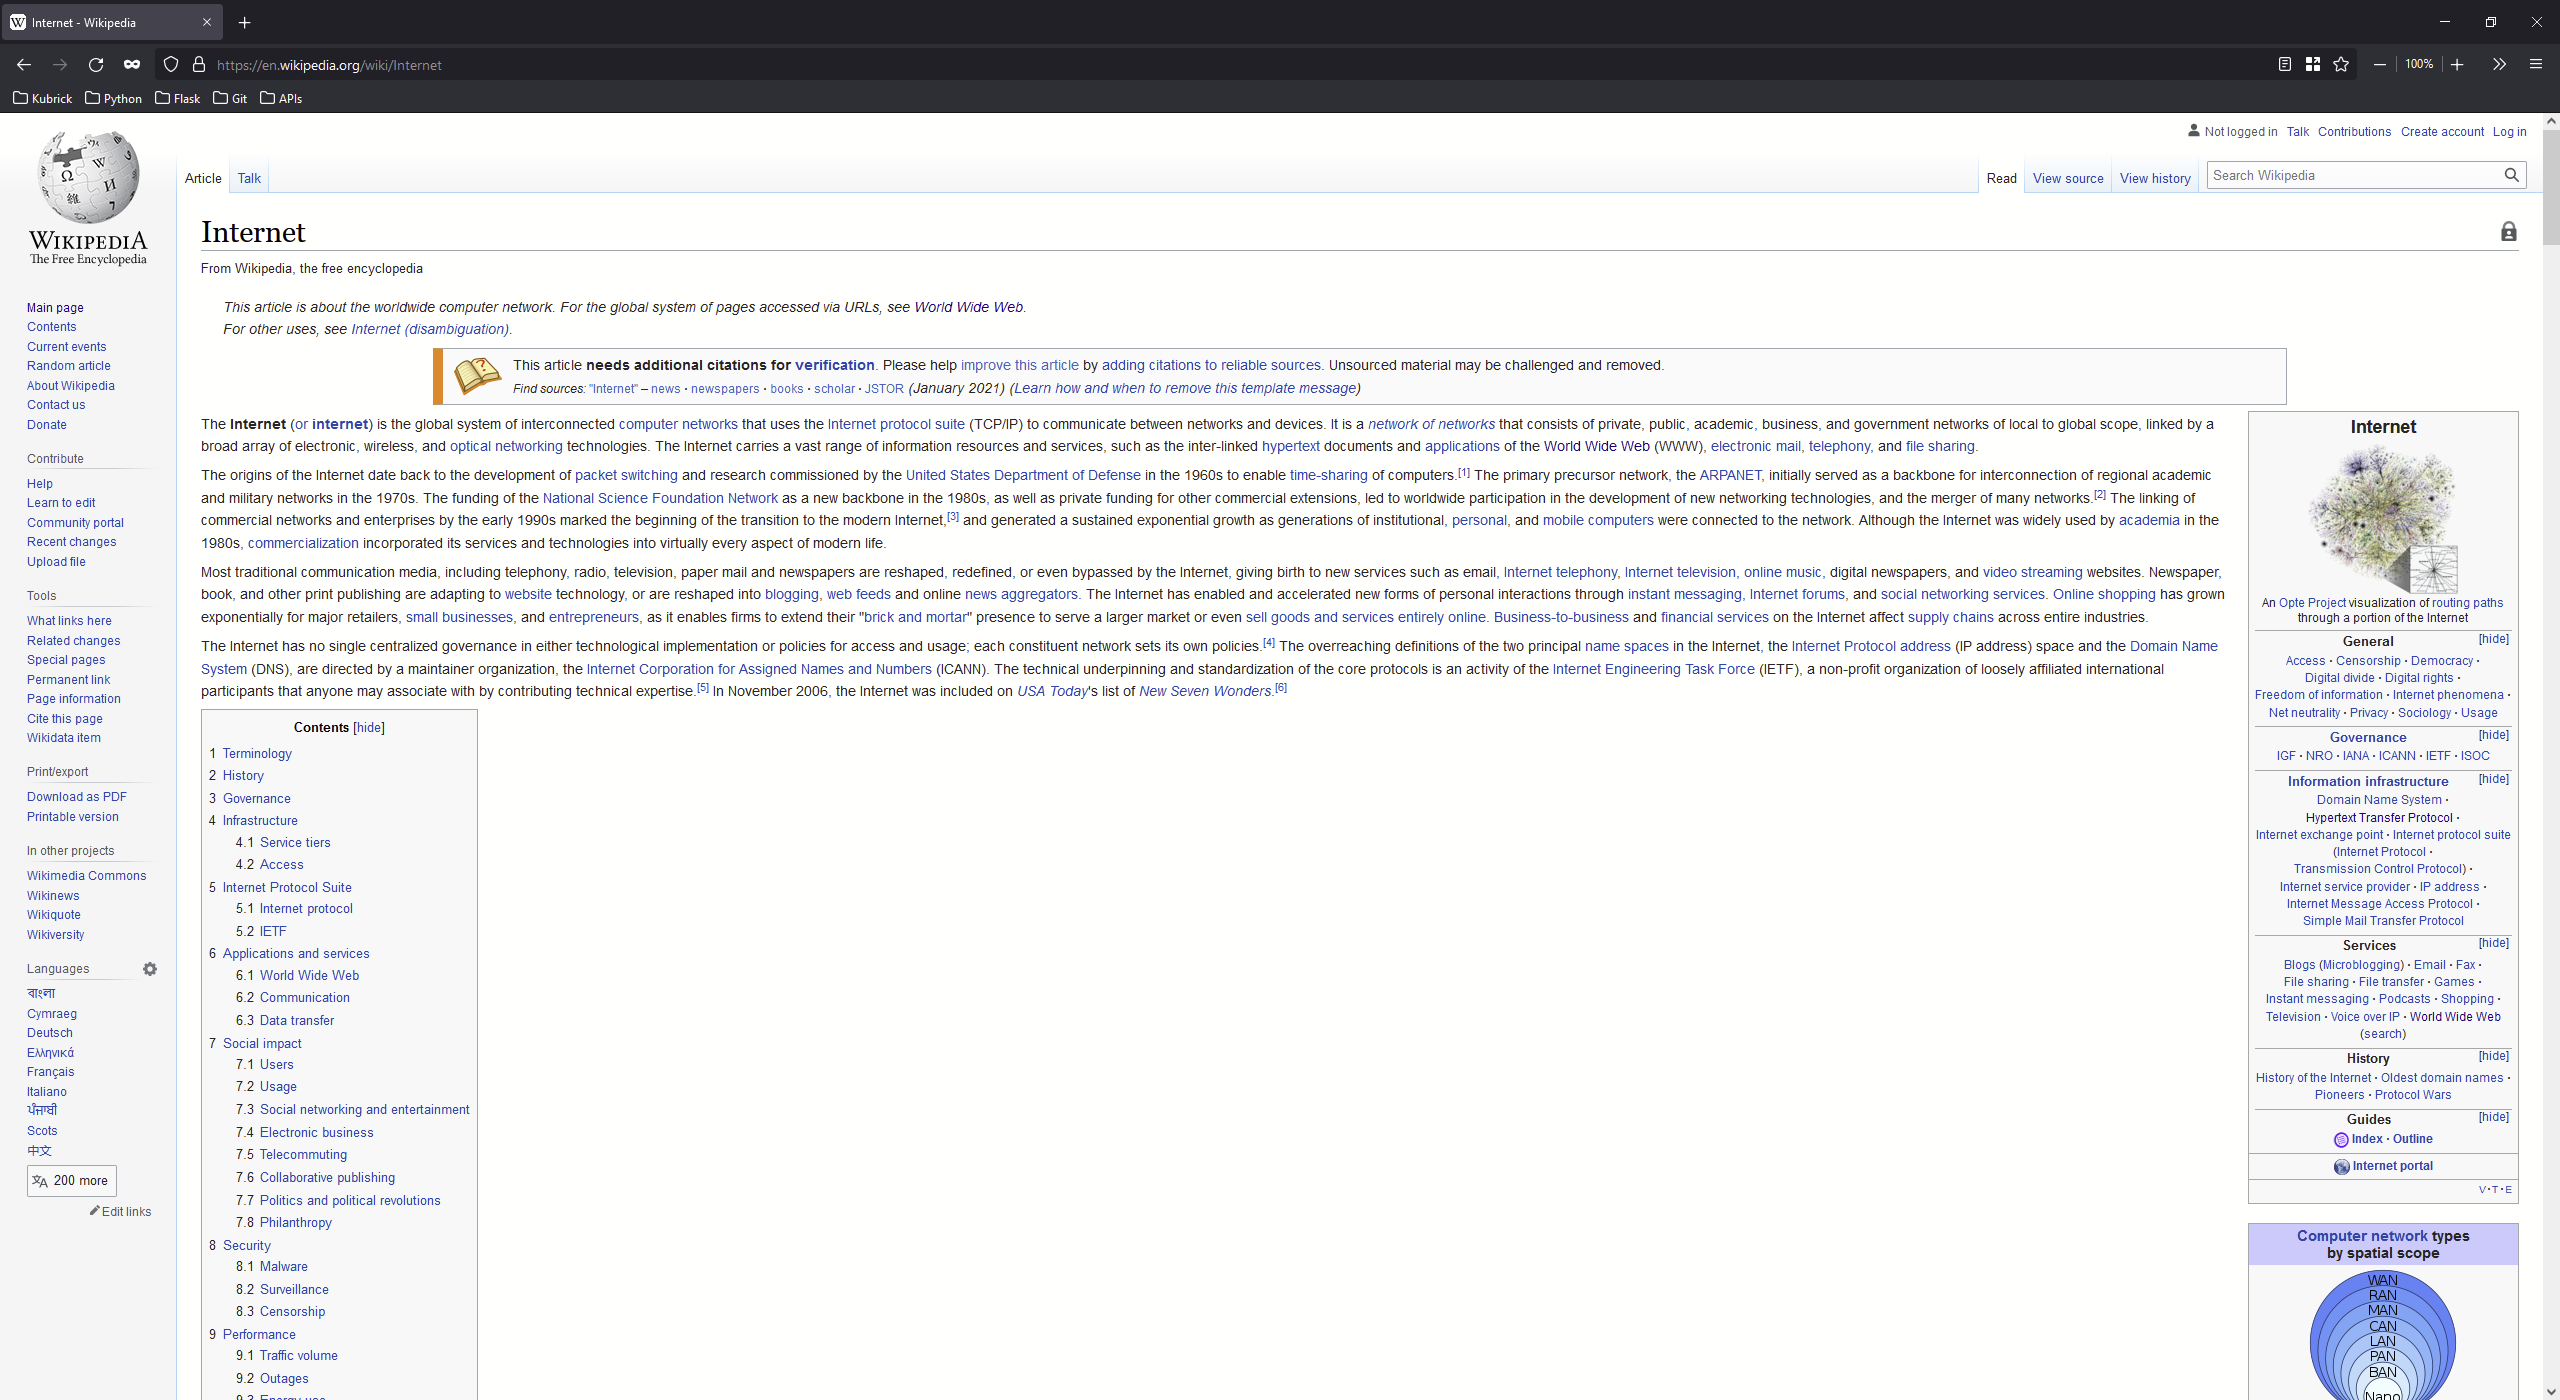

In [19]:
url = "https://en.wikipedia.org/wiki/Internet"
r = requests.get(url)
print("Status code: ", r.status_code)


Status code:  200


In [20]:
soup = BeautifulSoup(r.text, "html.parser")

Find the table containing the data for the worldwide Internet users and get its tag and attributes.

<center>
    <div>
        <img src="Images\wikipedia_table.png"/>
    </div>
</center>
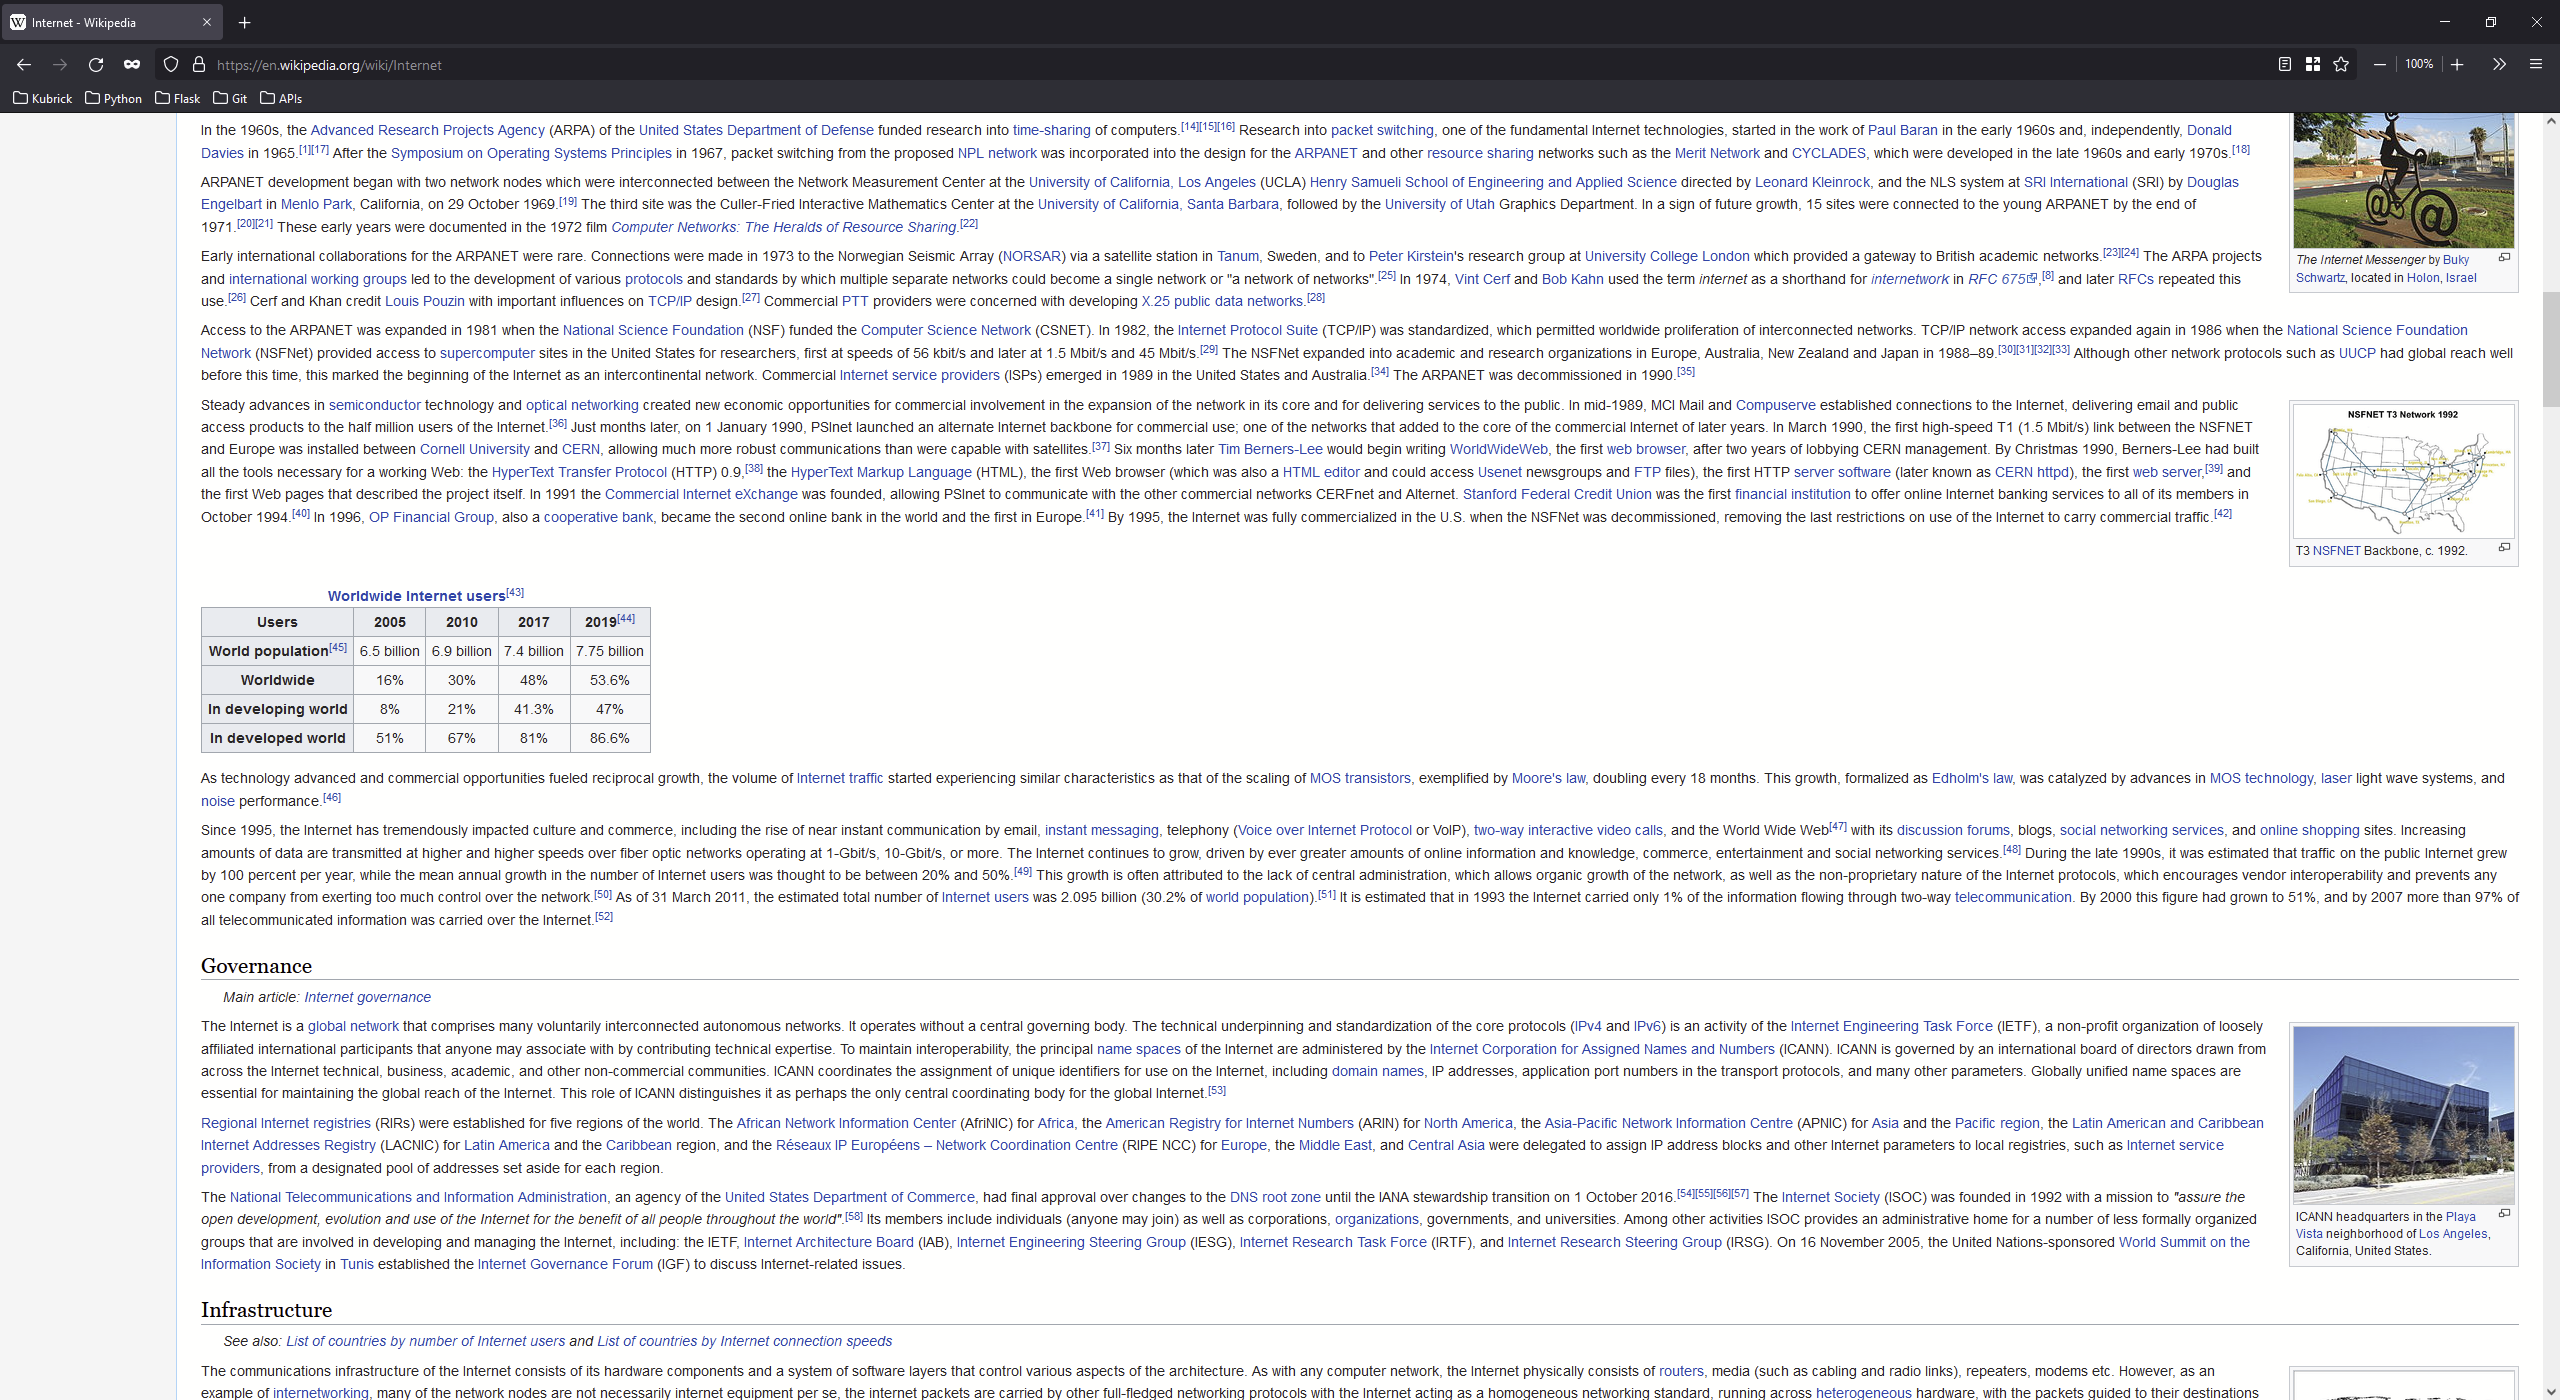

In [22]:
tag = "table"
attributes = {"class": "wikitable"}
table_soup = soup.find(tag, attributes)

In [23]:
table_soup

<table class="wikitable" style="text-align: center; float right; clear: right;">
<caption><a href="/wiki/List_of_countries_by_number_of_Internet_users" title="List of countries by number of Internet users">Worldwide Internet users</a><sup class="reference" id="cite_ref-WWIU_ITCFactsAndFigures-2014_46-0"><a href="#cite_note-WWIU_ITCFactsAndFigures-2014-46">[44]</a></sup>
</caption>
<tbody><tr>
<th scope="col">Users</th>
<th scope="col">2005</th>
<th scope="col">2010</th>
<th scope="col">2017</th>
<th scope="col">2019<sup class="reference" id="cite_ref-47"><a href="#cite_note-47">[45]</a></sup>
</th></tr>
<tr>
<th scope="row">World population<sup class="reference" id="cite_ref-WWIU_USCensus-WorldPop1950to2050-2014_48-0"><a href="#cite_note-WWIU_USCensus-WorldPop1950to2050-2014-48">[46]</a></sup>
</th>
<td>6.5 billion
</td>
<td>6.9 billion
</td>
<td>7.4 billion
</td>
<td>7.75 billion
</td></tr>
<tr>
<th scope="row">Worldwide
</th>
<td>16%
</td>
<td>30%
</td>
<td>48%
</td>
<td>53.6%
</td><

In [28]:
table_data = []
for row in table_soup.find_all("tr"):
    if row.sup is not None:
        row.sup.decompose() # Remove the superscript references from the table if they are present
    row = [ele.text.strip() for ele in row.find_all(["th", "td"])]
    table_data.append(row)

# Check out the table
table_data

[['Users', '2005', '2010', '2017', '2019'],
 ['World population',
  '6.5 billion',
  '6.9 billion',
  '7.4 billion',
  '7.75 billion'],
 ['Worldwide', '16%', '30%', '48%', '53.6%'],
 ['In developing world', '8%', '21%', '41.3%', '47%'],
 ['In developed world', '51%', '67%', '81%', '86.6%']]

In [36]:
df = pd.DataFrame(table_data)
df

# mini-ex: get the table in the same format as the wiki table
col_names = df.iloc[0]
df.columns = col_names
df = df.iloc[1:]
df

,Users,2005,2010,2017,2019
1,World population,6.5 billion,6.9 billion,7.4 billion,7.75 billion
2,Worldwide,16%,30%,48%,53.6%
3,In developing world,8%,21%,41.3%,47%
4,In developed world,51%,67%,81%,86.6%


In [37]:
col_header = [col[0] for col in table_data] # first element for headers
col_data = [col[1:] for col in table_data] # rest is data
data = dict(zip(col_header, col_data))
df1 = pd.DataFrame(data)
df1

,Users,World population,Worldwide,In developing world,In developed world
0,2005,6.5 billion,16%,8%,51%
1,2010,6.9 billion,30%,21%,67%
2,2017,7.4 billion,48%,41.3%,81%
3,2019,7.75 billion,53.6%,47%,86.6%


#### Getting All the Paragraphs from the Page <a class='tocSkip'>

## 1.3 Customising Request Headers
Certain websites do not allow repeated HTTP requests from clients. 

In [38]:
url = r'https://www.reddit.com/r/dataengineering/.json'
r = requests.get(url)
print(r.status_code) # 429: Too many requests


429


In [ ]:
# We can get around this by changing the user agent

In [40]:
user_agent = r"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36"
r = requests.get(url, headers = {"User-Agent": user_agent})
print(r.status_code)

# We can find our user agent in the developers tools of our browser



200
